
# Visualization

This script is only for demo. You can modify the visualizing function to fit your own use.

The script visualizes the cumulative weight of incoming deliveries of the 5 biggest raw materials in the 150 first days of 2014

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set plot style for visual clarity
plt.style.use('seaborn-v0_8')

In [2]:
# Load the receival data
df = pd.read_csv('./data/kernel/receivals.csv')

# Convert 'date_arrival' to timezone-naive datetime
df['date_arrival'] = pd.to_datetime(df['date_arrival'], utc=True).dt.tz_localize(None)

# Filter data to include only entries from January through May 2014
mask = (df['date_arrival'] >= pd.Timestamp('2014-01-01')) & (df['date_arrival'] < pd.Timestamp('2014-05-31'))
df_2014 = df.loc[mask].copy()

In [3]:
def visualize_cumsum_top_rm(df):
    """
    Generates a cumulative net weight plot for the top 5 most active rm_id entries.

    Parameters:
        df (pd.DataFrame): A DataFrame containing at least 'date_arrival', 'net_weight', and 'rm_id'.

    Returns:
        None. Displays a matplotlib plot.
    """
    # Identify top 5 rm_ids by total net weight
    top_rm_ids = df.groupby('rm_id')['net_weight'].sum().nlargest(5).index
    df_top = df[df['rm_id'].isin(top_rm_ids)].copy()

    # Sort data and compute cumulative sum
    df_top.sort_values(by=['rm_id', 'date_arrival'], inplace=True)
    df_top['cumsum_weight'] = df_top.groupby('rm_id')['net_weight'].cumsum()

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot each rm_id group
    for rm_id, group in df_top.groupby('rm_id'):
        ax.plot(group['date_arrival'], group['cumsum_weight'], label=f"RM ID {rm_id}")

    # Format the plot
    ax.set_title('Cumulative Net Weight for Top 5 RM IDs (January–May 2014)', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cumulative Net Weight (kg)', fontsize=12)
    ax.legend(title='RM ID')
    ax.grid(True)

    # Improve date formatting on x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    fig.autofmt_xdate()

    plt.tight_layout()
    plt.show()

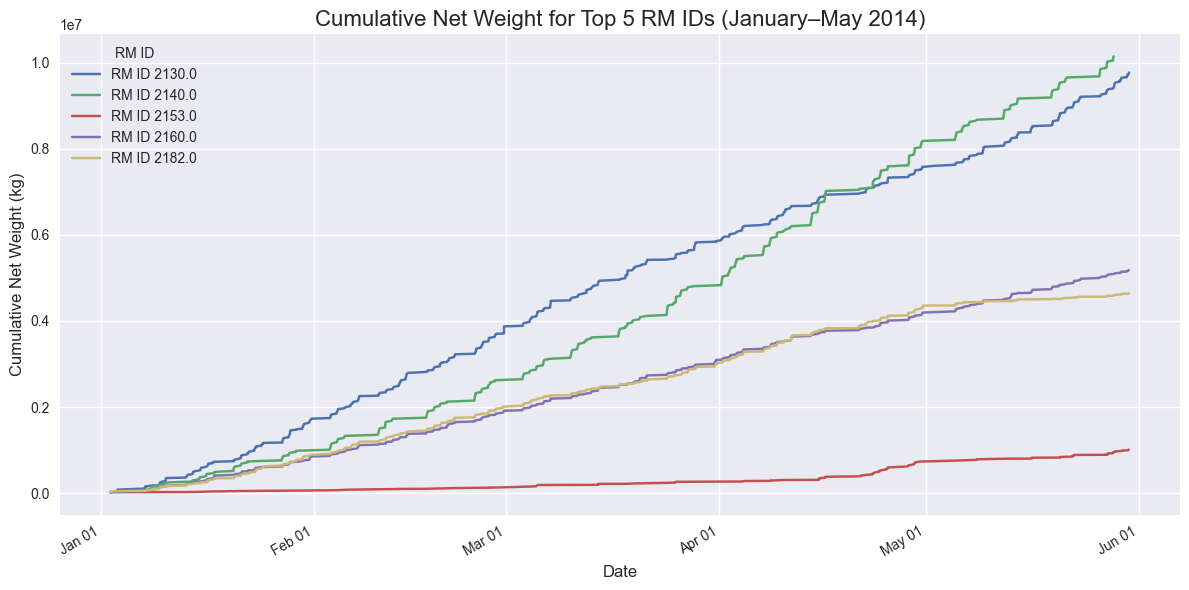

In [4]:
# Generate the visualization
visualize_cumsum_top_rm(df_2014)